
 CRISP-DM Project: Breast-cancer Detection
 



## 1. Problem Statement

Breast cancer remains one of the most common and life-impacting cancers worldwide. Early and accurate detection is essential for improving patient outcomes, guiding clinical decisions, and reducing unnecessary medical interventions.

Machine learning (ML) offers powerful tools for analyzing biomedical datasets such as the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset, which contains **767 samples** (569 Diagnostic + 198 Prognostic) described by 30 numerical features extracted from digitized Fine Needle Aspirate (FNA) images. **Note:** This notebook enriches the original WDBC dataset by merging it with the WPBC (Prognostic) dataset to increase the sample size of malignant cases. These features capture important morphological characteristics of cell nuclei (radius, texture, smoothness, concavity, symmetry, fractal dimension, etc.).

The goal is to evaluate how well each model distinguishes between **benign** and **malignant** tumors and determine which methods provide the strongest diagnostic support for medical use.
# Phase 1 — Business Understanding

....Business Objectives (BO)....

## BO1 — 
 Detect breast cancer as early as possible.

## BO2 — 
Help doctors make faster and more accurate diagnostic decisions.

## BO3 —
 Reduce unnecessary tests, biopsies, and medical procedures.

## BO4 — 
 Prioritize patients who require urgent medical attention.

....Data Science Objectives (DSO)....

## DSO1  
Use high-performance model to accurately predict malignant tumors early by learning patterns in WDBC feature distributions.

## DSO2 
Implement fast and interpretable models and compare them with deeper models to provide clinicians with quick and reliable diagnostic predictions.

## DSO3
Evaluate **selectivity (TNR)** and **fall-out (FPR)** across several models to identify those that minimize false alarms and reduce unnecessary procedures.

## DSO4
Focus on models with high **recall (TPR)** such as MLP, GRU-SVM, and Linear SVM to detect malignant cases with low false negative rates, ensuring high-risk patients receive immediate attention.



### Benchmark Table for All Models (With DSO Mapping)

| Model               | Accuracy | Recall (TPR) | Selectivity (TNR) | Fall-out (FPR) | FNR | Related DSO(s) |
|---------------------|----------|--------------|--------------------|----------------|-----|----------------|
| **Preprocessing & Feature DSOs** |||||||
| Dataset Preparation |    –     |      –       |        –           |       –        |  –  | **DSO1 & DSO2** |
| Feature Scaling     |    –     |      –       |        –           |       –        |  –  | **DSO1 & DSO2** |
| PCA / Dimensionality Reduction | – | – | – | – | – | **DSO2** |
| **Model Evaluation DSOs** |||||||
| Linear Regression   |          |              |                    |                |     | **DSO3**        |
| Softmax Regression  |          |              |                    |                |     | **DSO3**        |
| k-NN (k=5)          |          |              |                    |                |     | **DSO3**        |
| Linear SVM          |          |              |                    |                |     | **DSO3 & DSO4** |
| MLP (500-500-500)   |          |              |                    |                |     | **DSO4**        |
| GRU-SVM             |          |              |                    |                |     | **DSO4**        |


 Phase 2: Data Understanding


**Data Enrichment Note:**
We have merged the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset with the **Wisconsin Prognostic Breast Cancer (WPBC)** dataset. The Prognostic dataset contains follow-up data for patients with invasive breast cancer, which we treat as 'Malignant' cases for this diagnostic classification task. This enrichment helps to balance the classes and provides more examples of malignant tumors for the models to learn from.

In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Load the enriched dataset from local CSV
# This file was created by merging WDBC and WPBC datasets
try:
    df = pd.read_csv('data_enriched.csv')
    print(f"Successfully loaded enriched data. Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'data_enriched.csv' not found. Please run the download script first.")
    # Fallback to original if needed
    # df = pd.read_csv('data.csv')


Successfully loaded enriched data. Shape: (767, 32)


**Interpretation:** 👉 


In [3]:
# displaying first five rows
df.head(20)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   
15  84799002         M        14.54         27.54           96.73      658.8   
16    848406         M        14.68         20.13           94.74      684.5   
17  84862001         M        16.13         20.68          108.10      798.8   
18    849014         M        19.81         22.15          130.00     1260.0   
19   8510426         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0.14790              0.09498   
19          0.09779           0.08129         0.06664              0.04781   

    ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0   ...         25.38          17.33           184.60      2019.0   
1   ...         24.99          23.41           158.80      1956.0   
2   ...         23.57          25.53           152.50      1709.0   
3   ...         14.91          26.50            98.87       567.7   
4   ...         22.54          16.67           152.20      1575.0   
5   ...         15.47          23.75           103.40       741.6   
6   ...         22.88          27.66           153.20      1606.0   
7   ...         17.06          28.14           110.60       897.0   
8   ...         15.49          30.73           106.20       739.3   


In [4]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

diagnosis
M    410
B    357
Name: count, dtype: int64

**Interpretation:** 👉 




In [5]:
# shape of the dataframe
df.shape

(767, 32)

In [6]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       767 non-null    int64  
 1   diagnosis                767 non-null    object 
 2   radius_mean              767 non-null    float64
 3   texture_mean             767 non-null    float64
 4   perimeter_mean           767 non-null    float64
 5   area_mean                767 non-null    float64
 6   smoothness_mean          767 non-null    float64
 7   compactness_mean         767 non-null    float64
 8   concavity_mean           767 non-null    float64
 9   concave_points_mean      767 non-null    float64
 10  symmetry_mean            767 non-null    float64
 11  fractal_dimension_mean   767 non-null    float64
 12  radius_se                767 non-null    float64
 13  texture_se               767 non-null    float64
 14  perimeter_se             7

In [7]:
# column names
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
# checking for null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# descriptive statistics of data
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  7.670000e+02   767.000000    767.000000      767.000000   767.000000   
mean   2.304522e+07    14.975318     20.060574       97.877419   736.245111   
std    1.083817e+08     3.721421      4.492088       25.609881   377.849136   
min    8.423000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.651325e+05    12.210000     16.935000       78.300000   459.500000   
50%    9.029760e+05    14.250000     19.660000       93.630000   632.600000   
75%    8.711102e+06    17.640000     22.490000      115.500000   975.350000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       767.000000        767.000000      767.000000           767.000000   
mean          0.097992          0.114230        0.106210             0.058692   
std           0.013952          0.054680        0.082859             0.041066   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.087930          0.071385        0.037365             0.024090   
50%           0.097730          0.107400        0.092520             0.052710   
75%           0.106850          0.145700        0.157050             0.086980   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     767.000000  ...    767.000000     767.000000       767.000000   
mean        0.184154  ...     17.496074      26.829048       115.802464   
std         0.027868  ...      5.126723       6.414266        35.522849   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.163950  ...     13.460000      22.070000        87.470000   
50%         0.181500  ...     16.330000      26.380000       108.500000   
75%         0.198100  ...     20.975000      30.960000       140.200000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   767.000000        767.000000         767.000000       767.000000   
mean   1015.949935          0.135351           0.282877         0.314653   
std     617.591381          0.023166           0.166210         0.212639   
min     185.200000          0.071170           0.027290         0.000000   
25%     553.300000          0.120000           0.163450         0.144950   
50%     811.300000          0.135100           0.246300         0.291400   
75%    1330.000000          0.149750           0.374850         0.441200   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            767.000000      767.000000               767.000000  
mean               0.131172        0.298679                 0.085722  
std                0.067220        0.067112                 0.019138  
min                0.000000        0.156500                 0.055040  
25%                0.078460        0.255500                 0.072560  
50%                0.130800        0.286800                 0.081340  
75%                0.182950        0.325800                 0.094690  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

C:\Users\HP\AppData\Local\Temp\ipykernel_13004\2639374068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette='magma')


<Axes: xlabel='diagnosis', ylabel='count'>

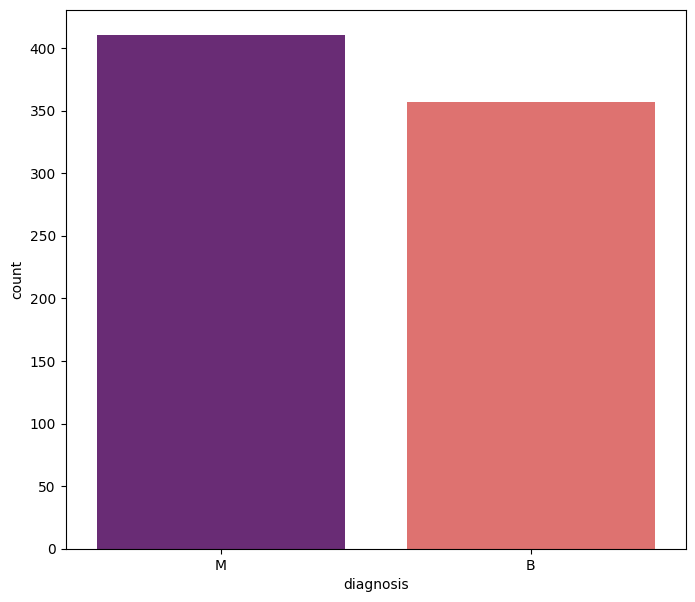

In [10]:
# countplot
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

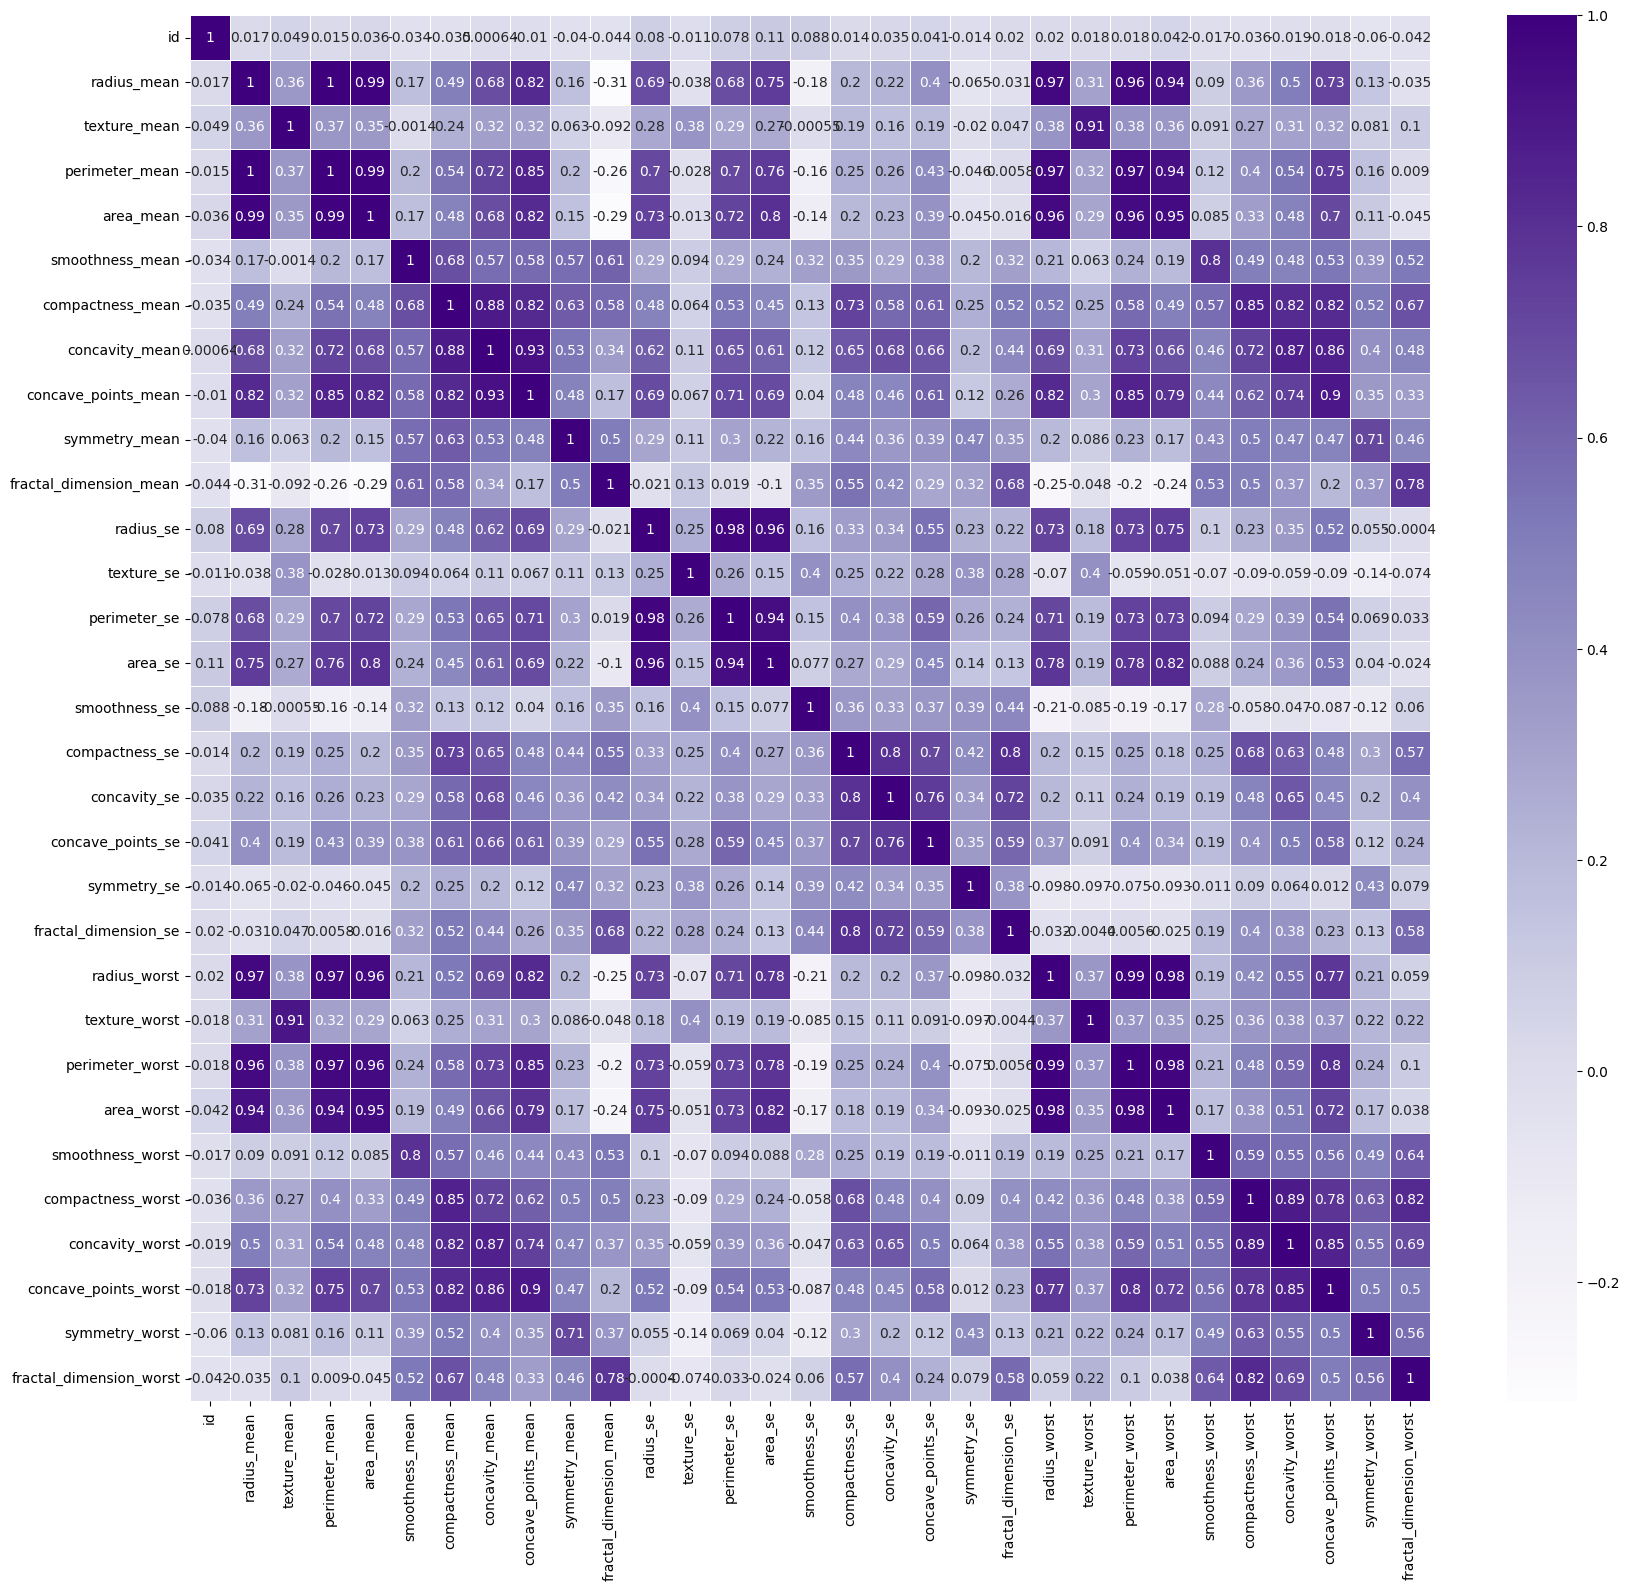

In [11]:
# heatmap
plt.figure(figsize=(20,18))
# compute correlation only on numeric columns to avoid converting non-numeric 'diagnosis'
num_df = df.select_dtypes(include=[np.number])
sns.heatmap(num_df.corr(), annot=True, linewidths=.5, cmap="Purples")
plt.show()

📌 1. Forte redondance entre plusieurs variables (corrélation > 0.9):On observe des blocs très foncés (correlation élevée), notamment entre :

🔹 Variables liées à la taille des cellules

radius_mean ↔ perimeter_mean ↔ area_mean

Même chose pour leurs équivalents _worst et _se.

Ces variables mesurent pratiquement la même chose :
👉 plus le rayon augmente, plus le périmètre et l’aire augmentent mécaniquement.

📌 2. Forte corrélation entre variables de “forme”:Les variables liées à l’irrégularité et à la netteté des contours montrent aussi de très fortes corrélations :

concavity_mean

concave points_mean

compactness_mean

Ces 3 variables augmentent ensemble lorsque le contour de la tumeur devient plus irrégulier.

📌 3. Les variables _worst sont toujours très corrélées avec les variables _mean:Exemples :

radius_mean ↔ radius_worst

texture_mean ↔ texture_worst

concave points_mean ↔ concave points_worst

Cela confirme que les variables _worst ne sont pas indépendantes :
elles représentent simplement la valeur maximale observée pour la même caractéristique.

📌 4. Les variables _se sont moins corrélées:👉 Elles reflètent la variation ou l’irrégularité des mesures, et donc apportent une information différente.

📌 5. Variables inutiles détectées:Deux colonnes montrent une faible utilité pour le modèle :

id → identifiant inutile

Unnamed: 32 → colonne vide (NaN)

👉 Elles doivent être retirées (ce que tu as fait correctement).

📌 6. Corrélations proches de zéro:ertaines variables montrent très peu de relation avec les autres, ex :

smoothness_se

fractal_dimension_se

👉 Elles représentent des détails très fins qui ne dépendent pas directement de la taille/forme globale.

In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

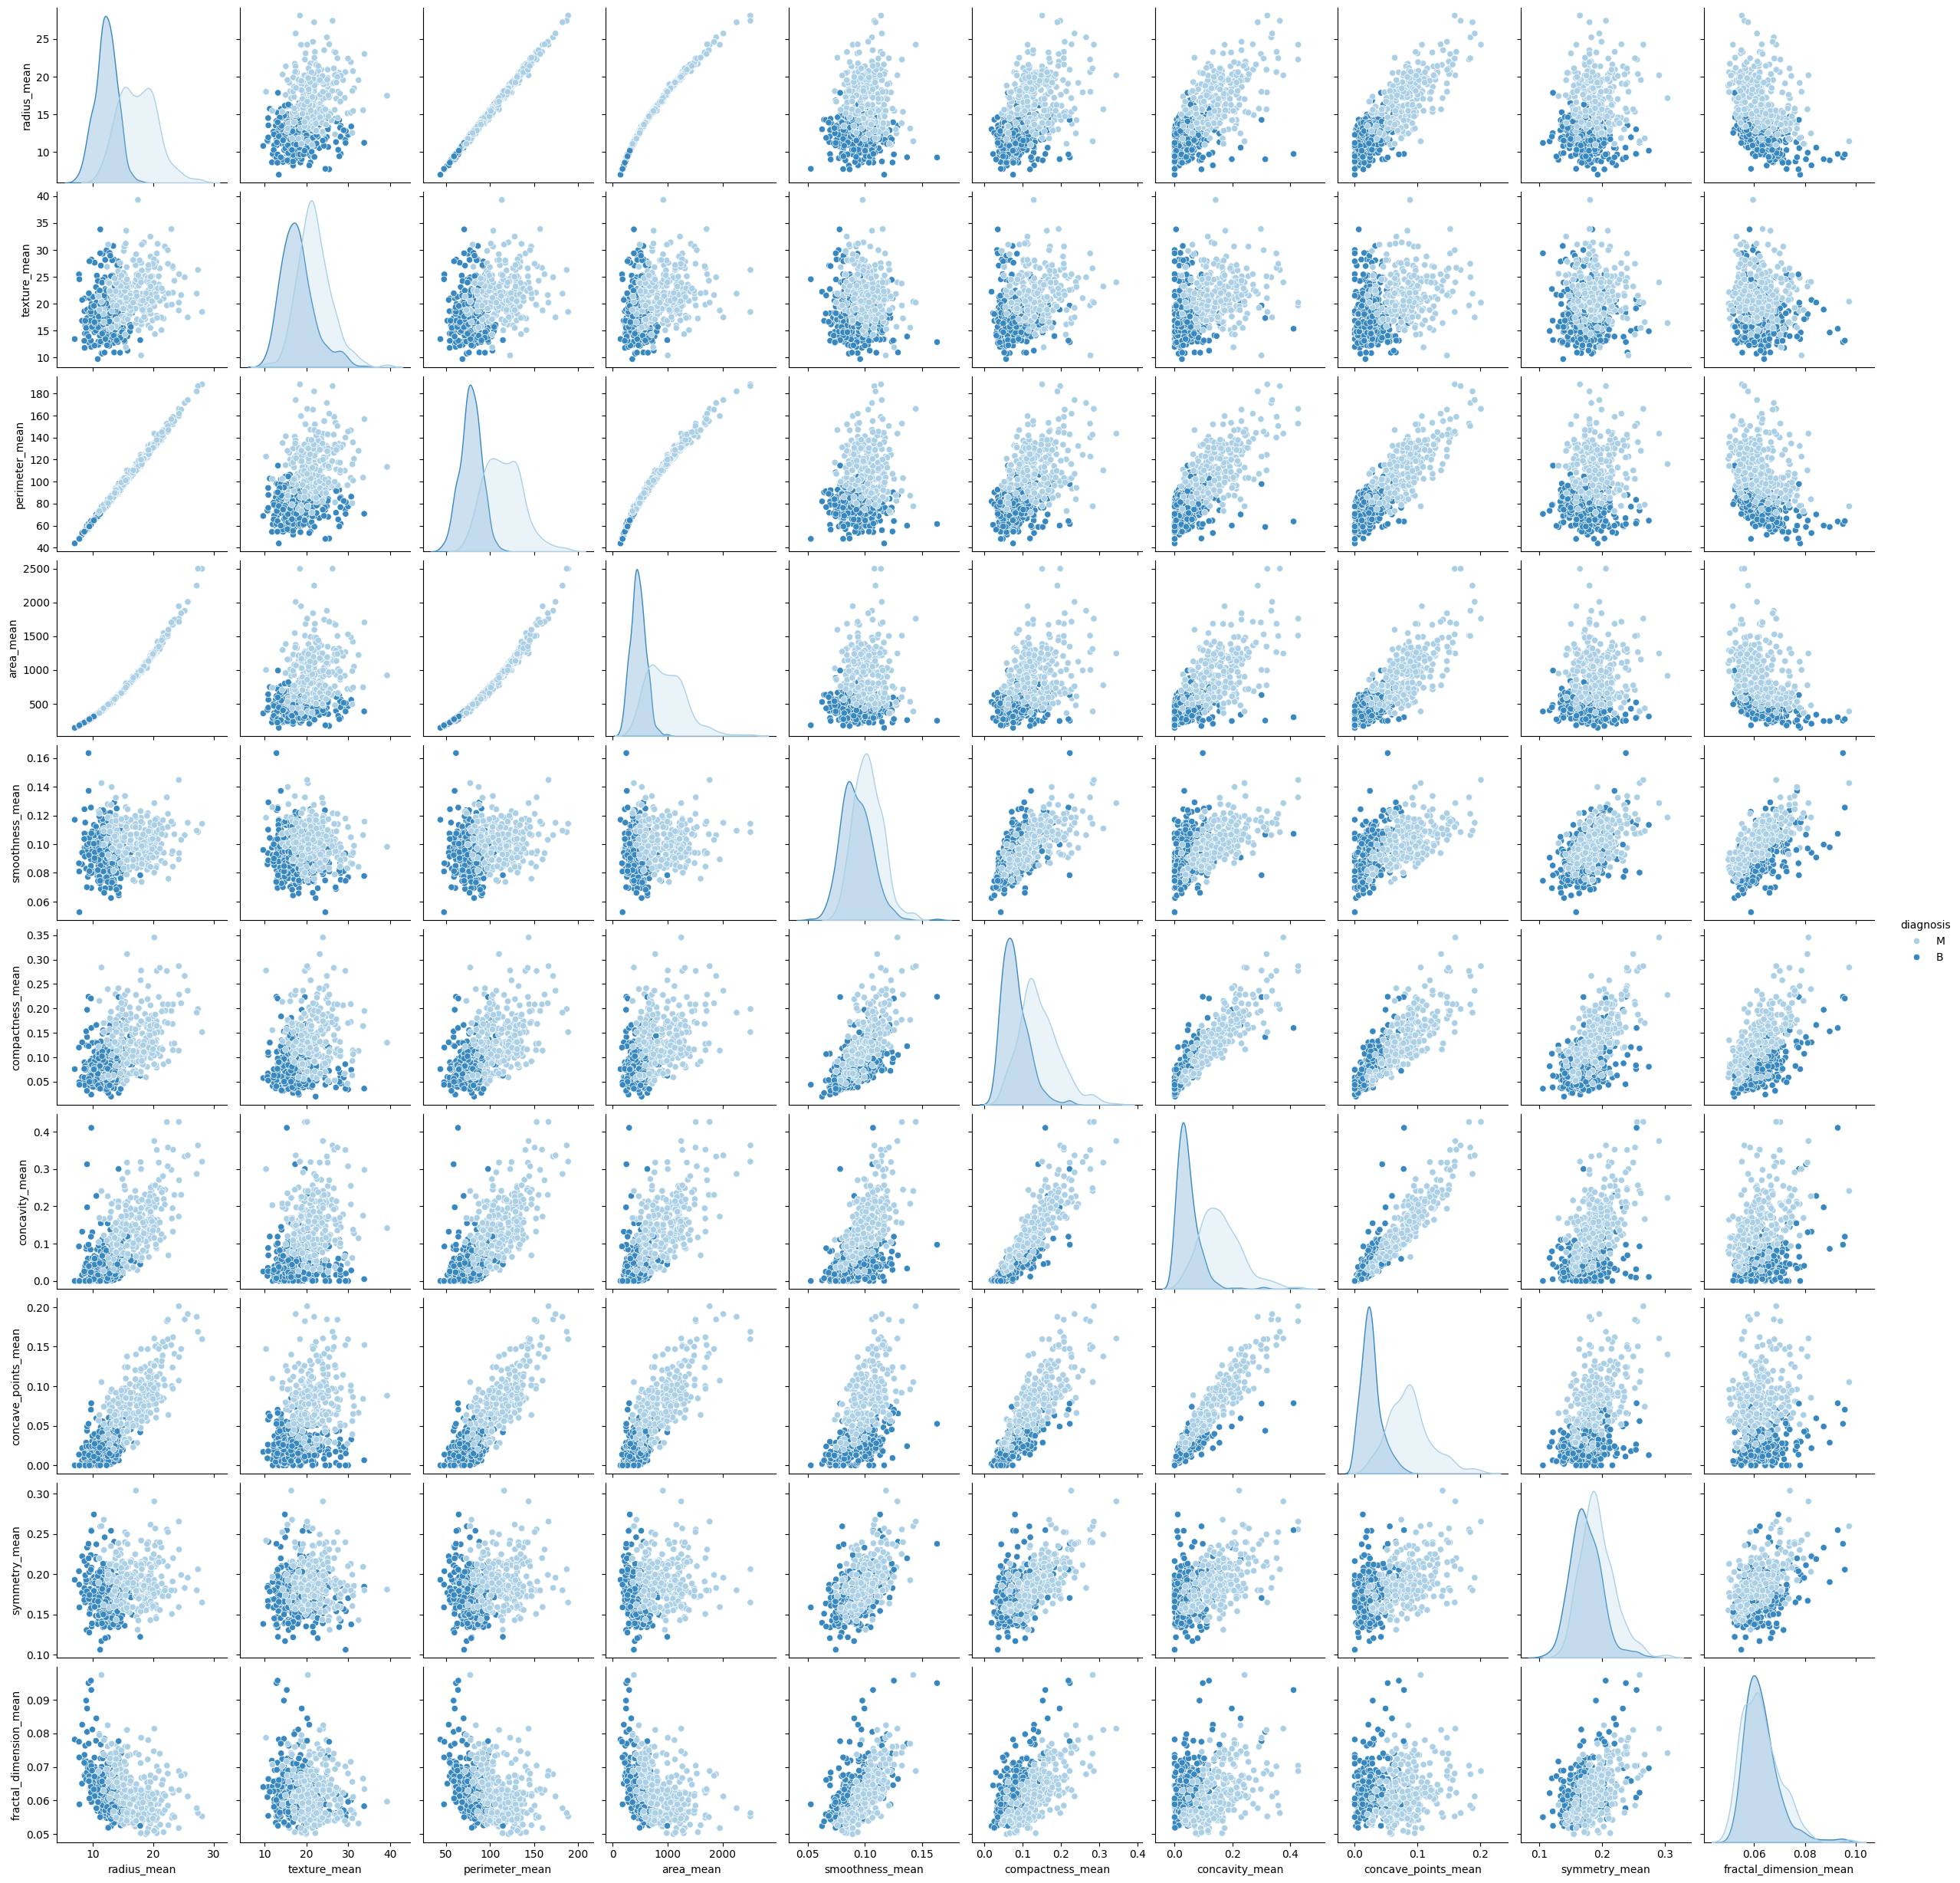

In [14]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

**Interpretation:** 👉Le pairplot des variables mean montre que les tumeurs malignes présentent des valeurs significativement plus élevées sur les mesures de taille (radius_mean, area_mean, perimeter_mean) ainsi que sur les mesures d’irrégularité de forme (concavity_mean, concave_points_mean).
Cette séparation visuelle nette entre les deux classes confirme la forte capacité discriminante de ces variables, ce qui justifie leur importance dans les modèles de classification

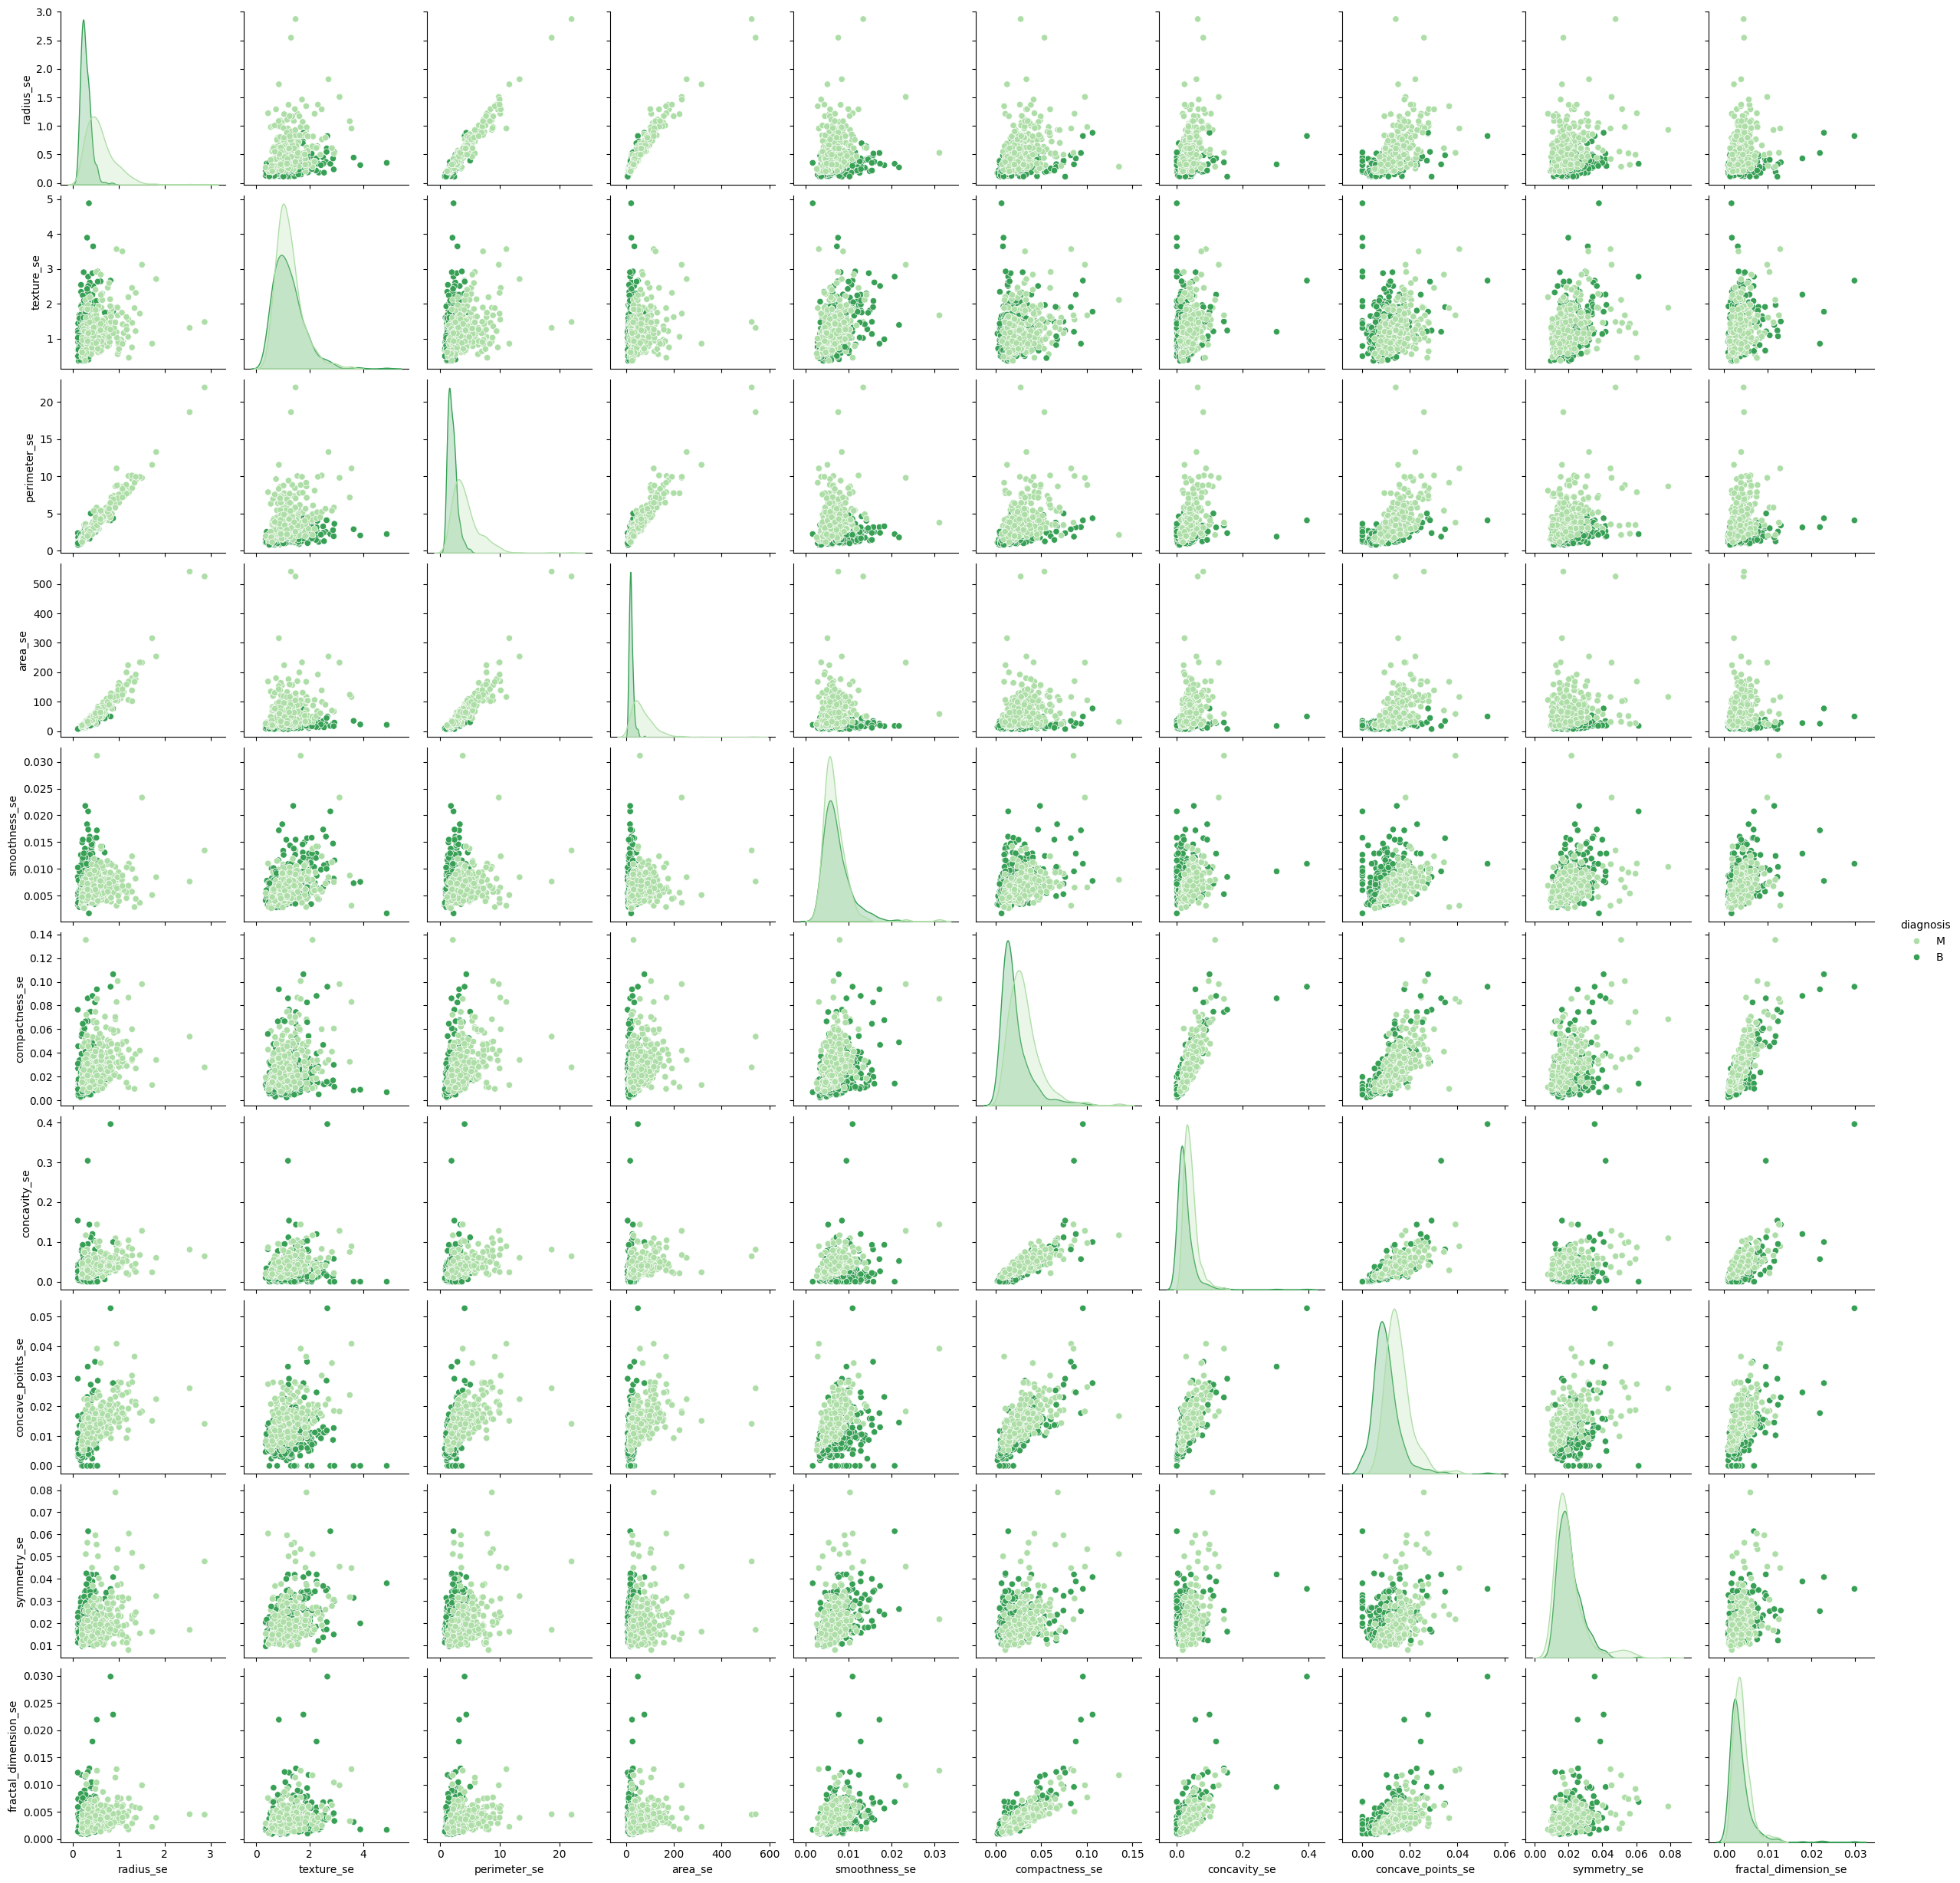

In [15]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

**Interpretation:** 👉Le pairplot des variables “standard error” montre un chevauchement important entre les tumeurs bénignes et malignes.
Bien que certaines variables telles que radius_se, area_se et perimeter_se présentent une tendance légèrement plus marquée chez les tumeurs malignes, l'ensemble des variables SE reste globalement peu discriminant, comparé aux colonnes mean ou worst.
Cela implique que leur contribution au modèle de classification est plus limitée

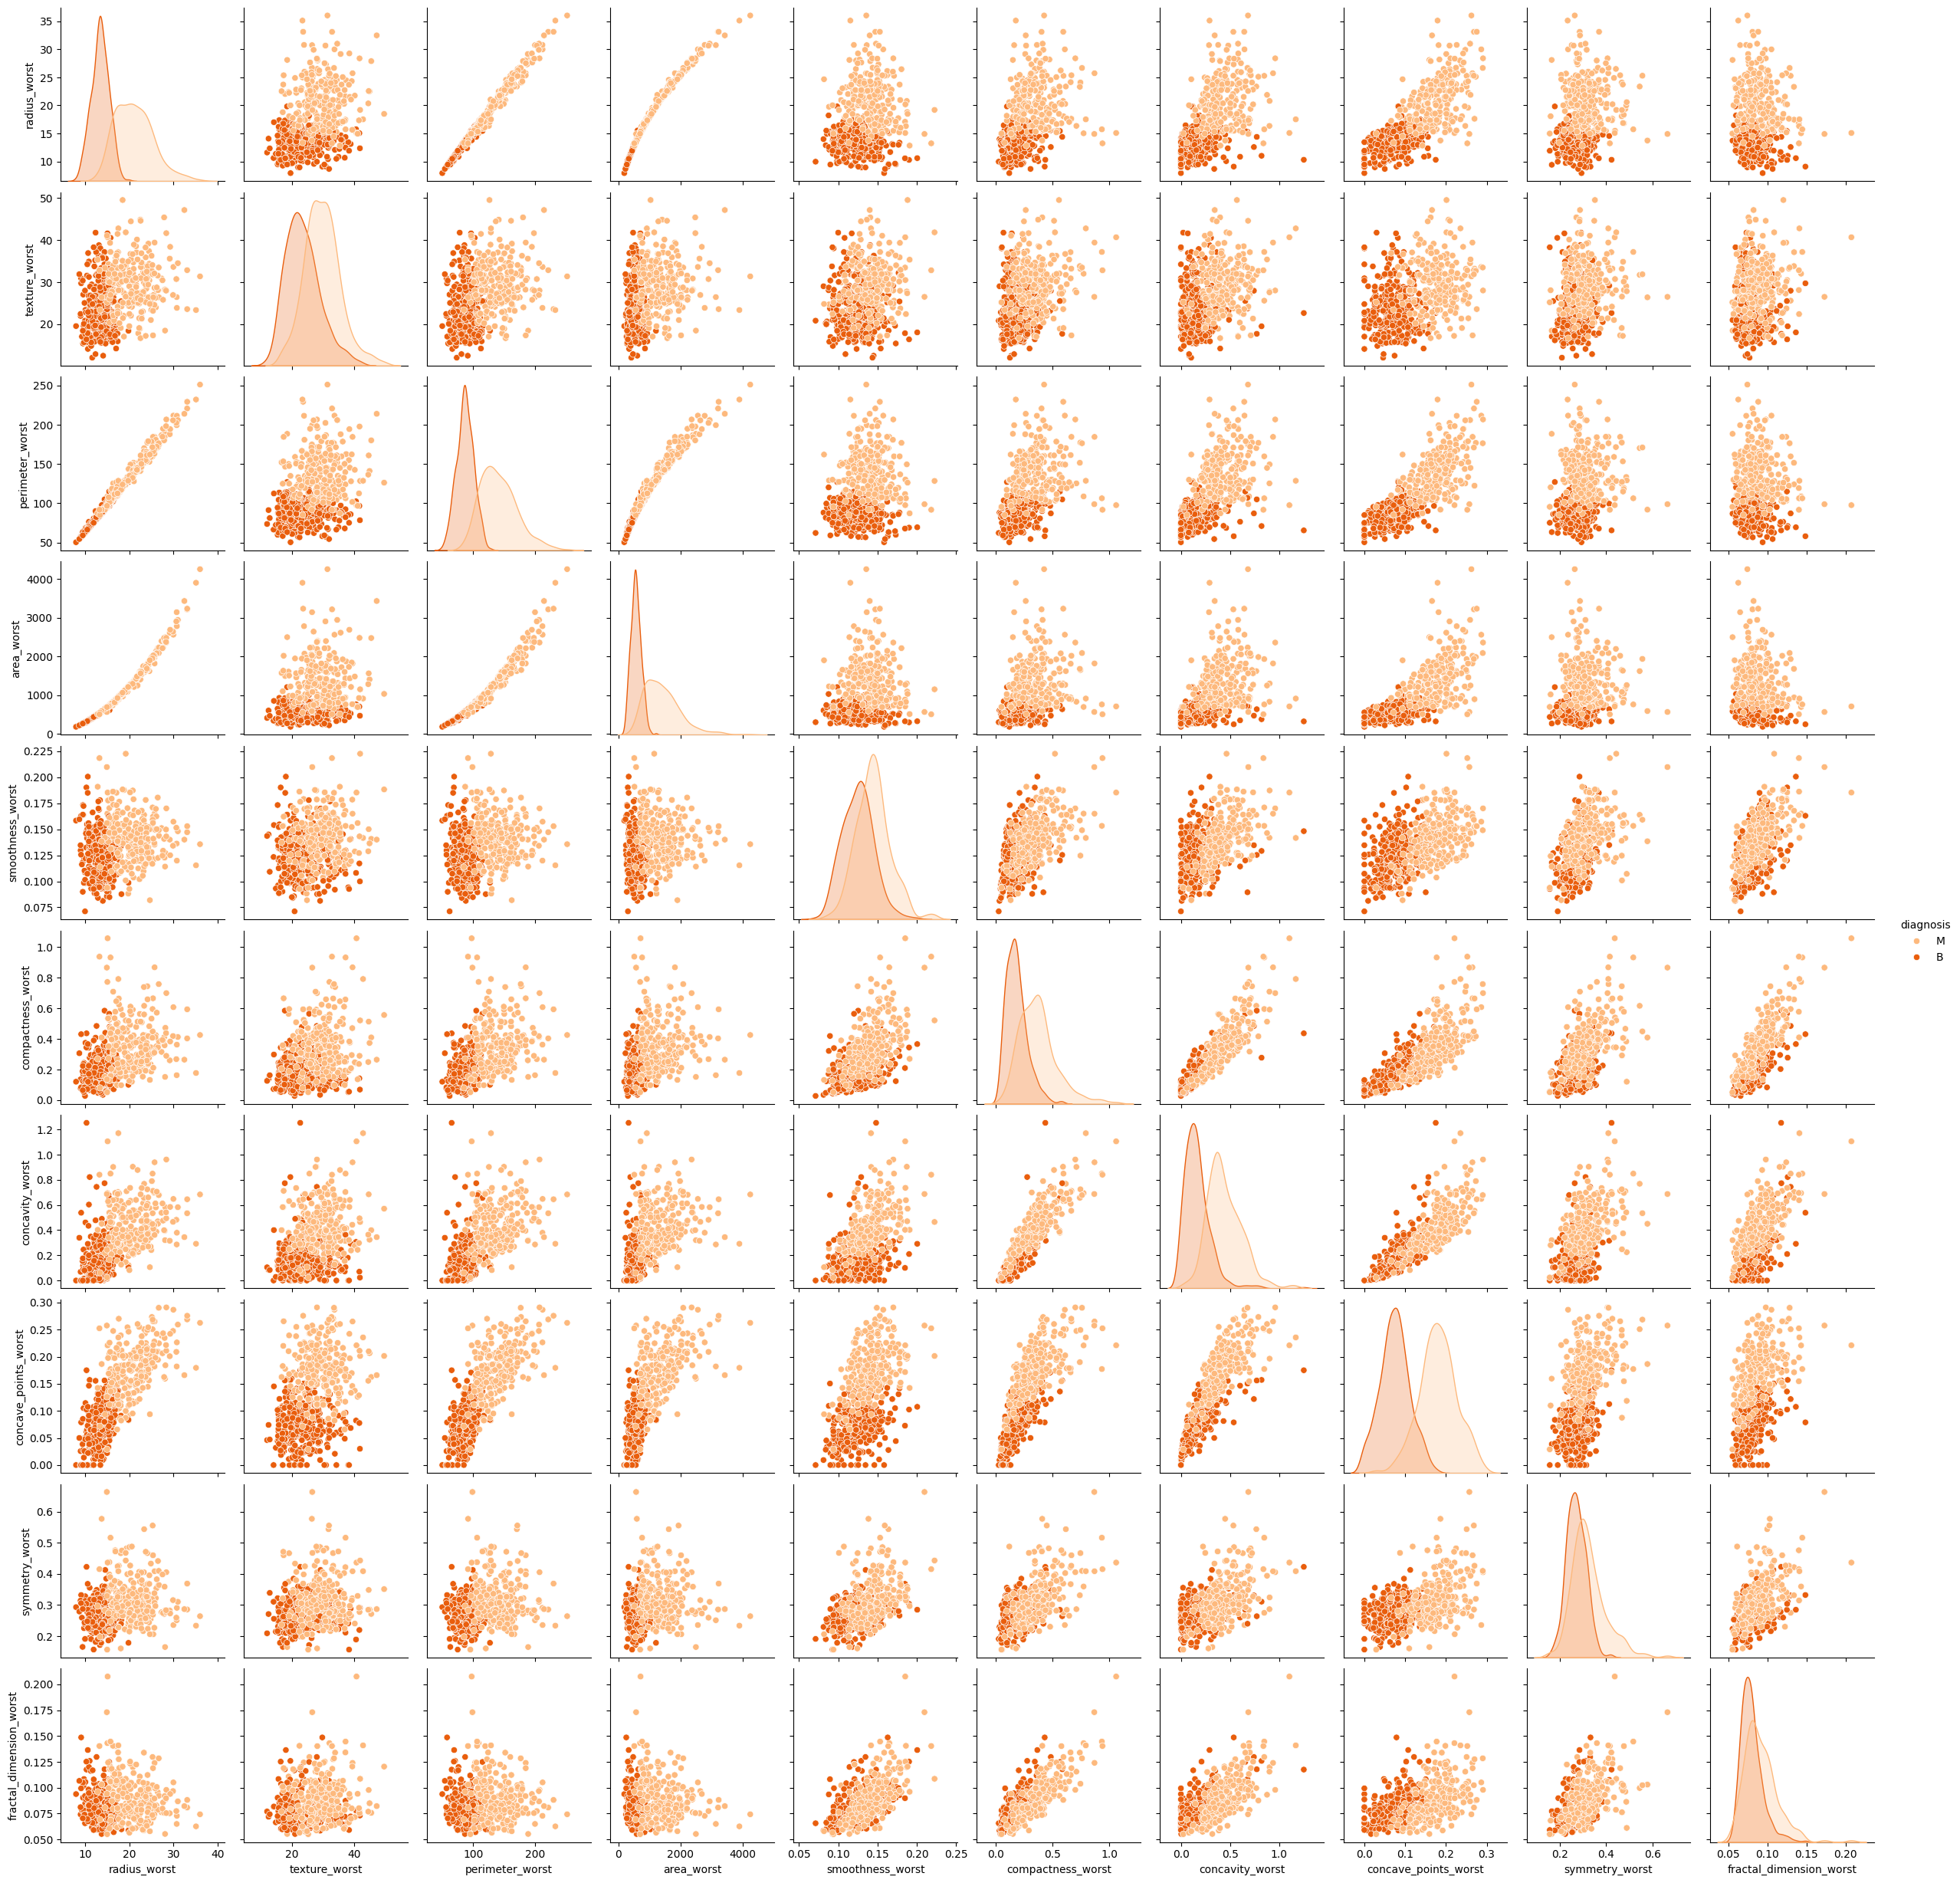

In [16]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Oranges')

**Interpretation:** 👉
Le pairplot des variables “worst” révèle une séparation particulièrement nette entre les tumeurs bénignes et malignes.
Les caractéristiques telles que radius_worst, perimeter_worst, area_worst et surtout concave_points_worst se distinguent par leur fort pouvoir discriminant, avec très peu de chevauchement entre les classes.
Ces variables représentent les formes les plus extrêmes observées dans les tumeurs et sont ainsi hautement informatives pour la classification.
Elles constituent les features les plus pertinentes pour l'entraînement d'un modèle

 Phase 3: Data Preparation


In [17]:
# drop 'Unnamed: 32' column if it exists (avoids KeyError and avoids assigning None)
if 'Unnamed: 32' in df.columns:
	df.drop('Unnamed: 32', axis=1, inplace=True)

In [18]:
# dropping id column if it exists to avoid KeyError
if 'id' in df.columns:
	df.drop('id', axis=1, inplace=True)

In [19]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [20]:
df['diagnosis'].value_counts()

diagnosis
1    410
0    357
Name: count, dtype: int64

Variance expliquée par PC1: 44.45%
Variance expliquée par PC2: 18.85%
👉 Variance totale expliquée (PC1+PC2): 63.30%


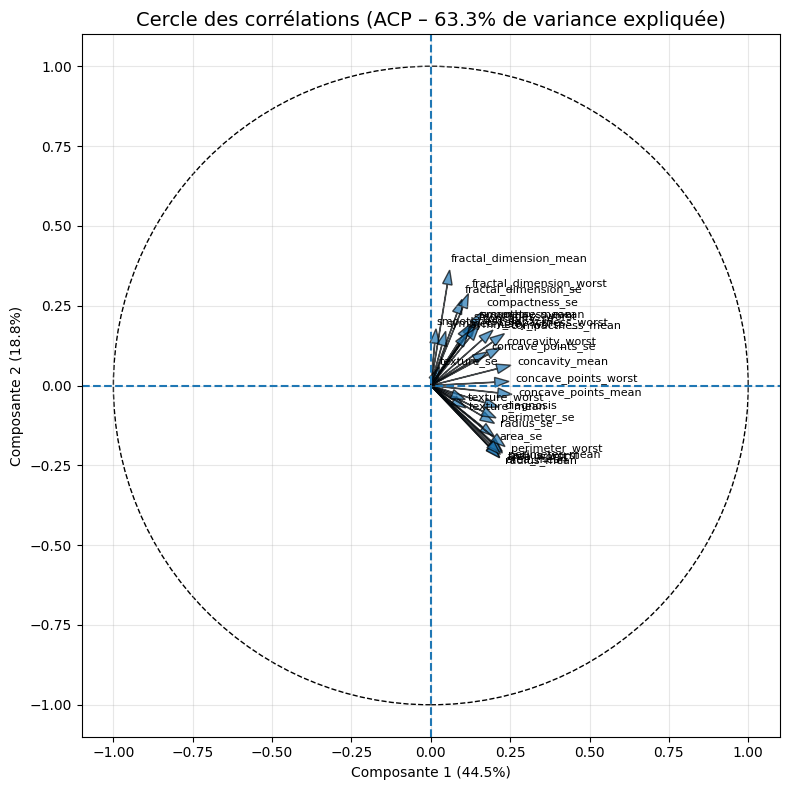

In [21]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 2️⃣ Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3️⃣ ACP (2 composantes principales)
pca = PCA(n_components=2, random_state=42)
pca.fit(X_scaled)

# 4️⃣ Résultats
pcs = pca.components_
explained_var = pca.explained_variance_ratio_ * 100
total_var = explained_var.sum()
print(f"Variance expliquée par PC1: {explained_var[0]:.2f}%")
print(f"Variance expliquée par PC2: {explained_var[1]:.2f}%")
print(f"👉 Variance totale expliquée (PC1+PC2): {total_var:.2f}%")

# 5️⃣ Cercle des corrélations
plt.figure(figsize=(8,8))
plt.title(f"Cercle des corrélations (ACP – {total_var:.1f}% de variance expliquée)", fontsize=14)
plt.xlabel(f"Composante 1 ({explained_var[0]:.1f}%)")
plt.ylabel(f"Composante 2 ({explained_var[1]:.1f}%)")

# Cercle unité
circle = plt.Circle((0,0), 1, fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Axes
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')

# 6️⃣ Flèches des variables
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, alpha=0.7, head_width=0.03, length_includes_head=True)
    plt.text(x*1.08, y*1.08, df.columns[i], fontsize=8)

# 7️⃣ Limites & layout
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [22]:
# =====================================================
# 🔍 Calcul des contributions des variables – ACP (PCA)
# =====================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 2️⃣ Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3️⃣ Application de la PCA (2 composantes principales)
pca = PCA(n_components=2, random_state=42)
pca.fit(X_scaled)

# 4️⃣ Calcul des contributions
# Les poids (loadings) représentent la corrélation entre chaque variable et chaque composante
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calcul du carré des loadings
squared_loadings = loadings ** 2

# Contribution (%) = (squared_loading / somme totale sur chaque composante) * 100
contrib = (squared_loadings / squared_loadings.sum(axis=0)) * 100

# 5️⃣ Création du tableau final
contrib_df = pd.DataFrame(
    contrib,
    columns=[f"Contribution PC{i+1} (%)" for i in range(pca.n_components_)],
    index=df.columns
).sort_values(by="Contribution PC1 (%)", ascending=False)

# 6️⃣ Affichage du tableau
print("🔹 Tableau des contributions (%) :")
print(contrib_df.round(2))

# 7️⃣ Affichage de la variance expliquée
explained_var = pca.explained_variance_ratio_ * 100
print(f"\nVariance expliquée par PC1 : {explained_var[0]:.2f}%")
print(f"Variance expliquée par PC2 : {explained_var[1]:.2f}%")
print(f"Variance totale expliquée : {explained_var.sum():.2f}%")



🔹 Tableau des contributions (%) :
                         Contribution PC1 (%)  Contribution PC2 (%)
concave_points_mean                      6.54                  0.08
concavity_mean                           6.37                  0.40
concave_points_worst                     6.08                  0.02
perimeter_worst                          5.46                  3.66
compactness_mean                         5.37                  2.64
radius_worst                             5.08                  4.47
perimeter_mean                           5.07                  4.26
concavity_worst                          4.87                  1.42
area_worst                               4.81                  4.66
radius_mean                              4.71                  5.06
area_mean                                4.69                  5.12
diagnosis                                4.57                  0.46
perimeter_se                             4.22                  1.03
radius_se     


 Phase 4: Modeling




 Phase 5: Evaluation


**Interpretation:** 👉 



 Phase 6: Deployment


# Phase 4: Modeling

In this phase, we implement and evaluate the 6 models defined in the benchmark table:
1. Linear Regression
2. Softmax Regression
3. k-NN (k=5)
4. Linear SVM
5. MLP (500-500-500)
6. GRU-SVM (Proxy)
7. Random Forest


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd
import numpy as np

# Prepare Data
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Hyperparameter Tuning for k-NN
from sklearn.model_selection import GridSearchCV

print("Tuning k-NN hyperparameters...")
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_knn_params = grid_search.best_params_
print(f"Best k-NN Parameters: {best_knn_params}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

best_knn_model = grid_search.best_estimator_


Tuning k-NN hyperparameters...
Best k-NN Parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9772


In [39]:
# Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Softmax Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "k-NN (Optimized)": best_knn_model,
    "Linear SVM": SVC(kernel='linear', probability=True),
    "MLP (500-500-500)": MLPClassifier(hidden_layer_sizes=(500, 500, 500), max_iter=1000, random_state=42),
    "GRU-SVM (Proxy)": SVC(kernel='rbf', probability=True), # Using RBF SVM as a strong proxy for non-linear classification
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    if name == "Linear Regression":
        y_pred_raw = model.predict(X_test_scaled)
        y_pred = (y_pred_raw >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_test_scaled)
    
    # Metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) # TPR
    selectivity = tn / (tn + fp) if (tn + fp) > 0 else 0 # TNR
    fall_out = fp / (tn + fp) if (tn + fp) > 0 else 0 # FPR
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0 # FNR
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Recall (TPR)": round(recall, 4),
        "Selectivity (TNR)": round(selectivity, 4),
        "Fall-out (FPR)": round(fall_out, 4),
        "FNR": round(fnr, 4)
    })

# Create DataFrame
results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Recall (TPR)  Selectivity (TNR)  \
0   Linear Regression    0.9870        0.9756             1.0000   
1  Softmax Regression    0.9870        0.9878             0.9861   
2          k-NN (k=5)    0.9675        0.9512             0.9861   
3    k-NN (Optimized)    0.9935        1.0000             0.9861   
4          Linear SVM    0.9870        0.9878             0.9861   
5   MLP (500-500-500)    0.9935        1.0000             0.9861   
6     GRU-SVM (Proxy)    0.9870        0.9756             1.0000   
7       Random Forest    0.9935        0.9878             1.0000   

   Fall-out (FPR)     FNR  
0          0.0000  0.0244  
1          0.0139  0.0122  
2          0.0139  0.0488  
3          0.0139  0.0000  
4          0.0139  0.0122  
5          0.0139  0.0000  
6          0.0000  0.0244  
7          0.0000  0.0122

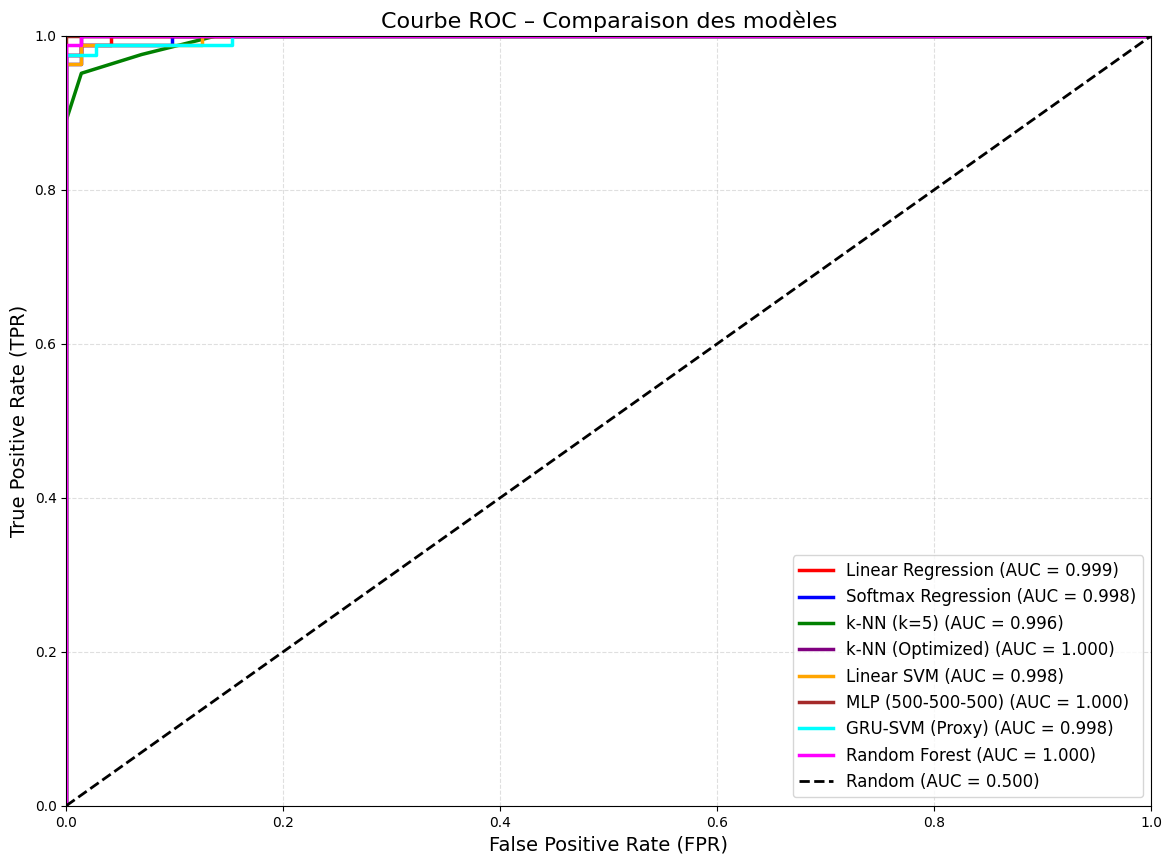

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Taille de la figure plus grande pour meilleure lisibilité
plt.figure(figsize=(14, 10))

# Palette de couleurs distinctes
colors = ["red", "blue", "green", "purple", "orange", 
          "brown", "cyan", "magenta", "deeppink", "olive"]

linewidth = 2.5
i = 0

for name, model in models.items():
    # Scores probabilistes
    if name == "Linear Regression":
        y_proba = model.predict(X_test_scaled)
    else:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_proba = model.decision_function(X_test_scaled)

    # Calcul ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Tracé avec couleur distincte et trait épais
    plt.plot(fpr, tpr, color=colors[i % len(colors)],
             lw=linewidth,
             label=f"{name} (AUC = {roc_auc:.3f})")
    i += 1

# Diagonale Random
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random (AUC = 0.500)")

# Axes complets pour tout afficher
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("Courbe ROC – Comparaison des modèles", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="lower right", fontsize=12)

plt.show()


# Phase 5: Model Interpretability (XAI)

To make our models transparent and understandable for human experts (doctors), we use LIME and SHAP.
We will focus on interpreting the **Random Forest** model as it is a powerful non-linear model.

## LIME (Local Interpretable Model-agnostic Explanations)

LIME explains individual predictions by approximating the model locally with an interpretable one.

## SHAP (SHapley Additive exPlanations)

SHAP assigns each feature an importance value for a particular prediction based on game theory.